In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sn
import seaborn as sns

In [16]:
data =pd.read_csv('1.01. Simple linear regression.csv')

In [17]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [77]:
y=data['GPA']
x1=data['SAT']

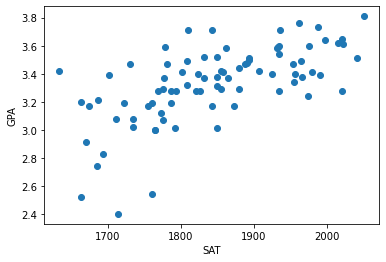

In [5]:
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [6]:
x =sn.add_constant(x1)

In [14]:
result=sn.OLS(y,x).fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           7.20e-11
Time:                        22:21:56   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

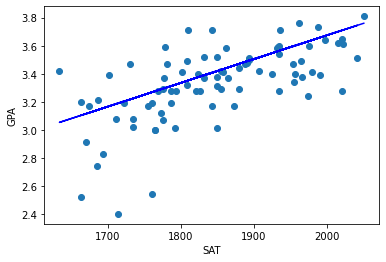

In [17]:
plt.scatter(x1,y)
yhat=0.0017*x1+0.2750
fig =plt.plot(x1,yhat,color='blue')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

In [29]:
x_matrix =x1.values.reshape(-1,1)

In [42]:
x_matrix.shape

(84, 1)

In [31]:
reg =LinearRegression()

In [36]:
reg.fit(x_matrix,y)

LinearRegression()

In [37]:
# calculate R square
reg.score(x_matrix,y)

0.40600391479679765

In [38]:
# calculate coef
reg.coef_

array([0.00165569])

In [39]:
# calculate intercept_
reg.intercept_

0.2750402996602803

In [50]:
reg.predict([[1690]])

array([3.0731531])

In [52]:
r2 =reg.score(x_matrix,y)
p=x_matrix.shape[1] # p-> # of columns
n=x_matrix.shape[0] # n -> # row 

adjust_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjust_r2

0.3987600600991976

# Feature sleaction

In [54]:
from sklearn.feature_selection import f_regression

In [57]:
f_regression(x_matrix,y) # first array is F-statistics , and second aray is P-Value

(array([56.04804786]), array([7.19951844e-11]))

In [60]:
p_value= f_regression(x_matrix,y)[1]
p_value

array([7.19951844e-11])

In [62]:
p_value.round() # the output is so SAT useful to predict GPA unlike rand1,2,3 in 365 multi linear example  when p =0.676

array([0.])

# sumarry table

In [85]:
t_reg =pd.DataFrame(data=['SAT'],columns=['feautre'])
t_reg['p-value']=p_value.round(3)
t_reg['F-STATS']=f_regression(x_matrix,y)[0].round(3)
t_reg['R2']=r2
t_reg['Adjust R2']= adjust_r2
t_reg

,feautre,p-value,F-STATS,R2,Adjust R2
0,SAT,0.0,56.048,0.406004,0.39876


# standardization

### make feature betwwen 0:1 scale the data

In [86]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler =StandardScaler()

In [91]:
scaler.fit(x_matrix)

StandardScaler()

In [93]:
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [94]:
x_scaled = scaler.transform(x_matrix)
x_scaled

array([[-1.26338288],
       [-1.74458431],
       [-0.82067757],
       [-1.54247971],
       [-1.46548748],
       [-1.68684014],
       [-0.78218146],
       [-0.78218146],
       [-0.51270866],
       [ 0.04548499],
       [-1.06127829],
       [-0.67631715],
       [-1.06127829],
       [-1.28263094],
       [-0.6955652 ],
       [ 0.25721362],
       [-0.86879772],
       [-1.64834403],
       [-0.03150724],
       [-0.57045283],
       [-0.81105355],
       [-1.18639066],
       [-1.75420834],
       [-1.52323165],
       [ 1.23886453],
       [-0.18549169],
       [-0.5608288 ],
       [-0.23361183],
       [ 1.68156984],
       [-0.4934606 ],
       [-0.73406132],
       [ 0.85390339],
       [-0.67631715],
       [ 0.09360513],
       [ 0.33420585],
       [ 0.03586096],
       [-0.35872421],
       [ 1.04638396],
       [-0.65706909],
       [-0.13737155],
       [ 0.18984542],
       [ 0.04548499],
       [ 1.1618723 ],
       [-1.37887123],
       [ 1.39284898],
       [ 0

In [95]:
reg2= LinearRegression()

In [96]:
reg2.fit(x_scaled,y)

LinearRegression()

In [97]:
reg2.score(x_scaled,y)

0.40600391479679754

In [98]:
reg2.predict([[1714]])

array([298.20148836])

In [105]:
z =scaler.transform([[1664]])

In [106]:
reg2.predict(z)

array([3.03010522])

# Split the DATA Set

#### train_test_split function split the data and shuffle it by default it split to 75% , 20% 

In [107]:
from sklearn.model_selection import train_test_split # use to split the data to handle overfiting

In [128]:
x_train,x_test =train_test_split(x_scaled,test_size=0.2,shuffle=True,random_state=10) 
# every time we run the cell the data will shuffel so we use random state and get it number thats is option

In [121]:
x_train.shape,x_test.shape

((67, 1), (17, 1))

In [126]:
x_train

array([[ 1.6334497 ],
       [-0.02188321],
       [-0.82067757],
       [ 1.03675993],
       [-0.13737155],
       [ 0.8250313 ],
       [-1.46548748],
       [-1.68684014],
       [-1.10939843],
       [-2.03330517],
       [ 1.46021718],
       [-0.5608288 ],
       [-0.81105355],
       [ 0.40157405],
       [ 1.39284898],
       [ 0.03586096],
       [ 1.04638396],
       [-1.64834403],
       [ 0.76728713],
       [ 1.1618723 ],
       [-0.78218146],
       [ 1.68156984],
       [ 0.85390339],
       [ 1.12337618],
       [ 1.97029069],
       [ 1.23886453],
       [-1.06127829],
       [-0.35872421],
       [ 1.24848856],
       [-0.61857297],
       [-1.52323165],
       [ 1.14262424],
       [ 1.88367444],
       [ 0.87315144],
       [-0.03150724],
       [-0.23361183],
       [ 1.69119387],
       [ 0.85390339],
       [-1.74458431],
       [-1.06127829],
       [ 1.3639769 ],
       [ 0.44007016],
       [-0.73406132],
       [-1.75420834],
       [-0.33947615],
       [-0